## 1. Matplotlib에서 Text
구현으로 알아보는 Text

### 1.1 Text in Viz
- 시각화에 Text가 중요할까
    - Visual representation들이 **줄 수 없는 많은 설명을 추가**할 수 있다.
    - 잘못된 전달에서 생기는 **오해를 방지**할 수도 있다.


- 하지만 Text를 과하게 사용하면 오히려 이해를 방해할 수도 있다.

### 1.2 Anatomy of a Figure(Text Ver.)

<img src="../images/ai_35.png" width=450;>

- Title : 가장 큰 주제를 설명
- Label : 축에 해당하는 데이터 정보를 제공
- Tick Label : 축에 눈금을 사용하여 스케일 정보를 추가
- Legend : 한 그래프에서 2개 이상의 서로 다른 데이터를 분류하기 위해서 사용하는 보조 정보
- Annotation(Text) : 그 외의 시각화에 대한 설명을 추가

---
# 실습

# Text

## 1. Text API in Matplotlib

기본적인 요소를 다시 한 번 살펴보겠습니다.

|pyplot API|Objecte-oriented API|description|
|-|-|-|
|`suptitle`|`suptitle`|title of figure|
|`title`|`set_title`|title of subplot `ax`|
|`xlabel`|`set_xlabel`|x-axis label|
|`ylabel`|`set_ylabel`|y-axis label|
|`figtext`|`text`|figure text|
|`text`|`text`|Axes taext|
|`annoatate`|`annotate`|Axes annotation with arrow|

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt

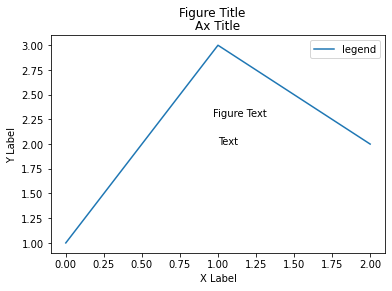

In [2]:
fig, ax = plt.subplots()

# suptitle 로 super title 정함
fig.suptitle('Figure Title')

ax.plot([1, 3, 2], label='legend')
ax.legend()

# sub plot의 title 지정
ax.set_title('Ax Title')

# label 표시
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

# ax 기준 1. 2 위치에 text
ax.text(x=1,y=2, s='Text')

# figure 기준 0.5, 0.6 위치에 text
fig.text(0.5, 0.6, s='Figure Text')

plt.show()

## 2. Text Properties

### 2-1. Font Components

가장 쉽게 바꿀 수 있는 요소로는 다음 요소가 있습니다.

- `family`
- `size` or `fontsize`
- `style` or `fontstyle`
- `weight` or `fontweight`



글씨체에 따른 가독성 관련하여는 다음 내용을 참고하면 좋습니다.

- [Material Design : Understanding typography](https://material.io/design/typography/understanding-typography.html)
- [StackExchange : Is there any research with respect to how font-weight affects readability?](https://ux.stackexchange.com/questions/52971/is-there-any-research-with-respect-to-how-font-weight-affects-readability)



아래는 [Fonts Demo](https://matplotlib.org/stable/gallery/text_labels_and_annotations/fonts_demo.html)입니다.

![](https://matplotlib.org/stable/_images/sphx_glr_fonts_demo_001.png)

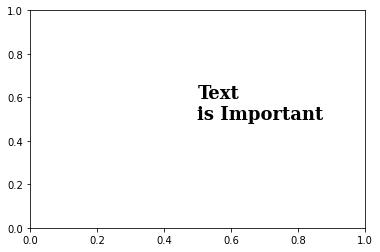

In [11]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=18,
        fontweight='semibold',
        fontfamily='serif',
       )




plt.show()

### 2-2. Details

폰트 자체와는 조금 다르지만 커스텀할 수 있는 요소들입니다.

- `color` : 색상
- `linespacing` : 줄간격
- `backgroundcolor` : 배경색
- `alpha` : 투명도
- `zorder` : z축 순서(맨 앞으로 가져오기)
- `visible` : 보이지않게(굳이 사용 x)


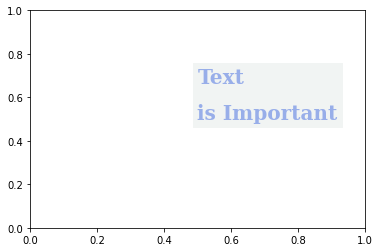

In [18]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        color='royalblue',
        linespacing=2,
        backgroundcolor='#f1f4f3',
        alpha=0.5
       )


plt.show()

### 2-3. Alignment

정렬과 관련하여 이런 요소들을 조정할 수 있습니다.

- `ha` : horizontal alignment
- `va` : vertical alignment
- `rotation`
- `multialignment`


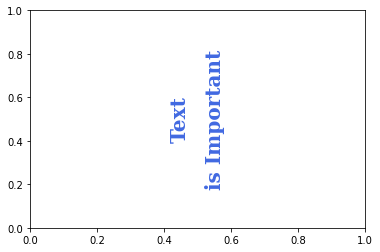

In [21]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        color='royalblue',
        linespacing=2,
        va='center', # vertical alignment(수직조절)top, bottom, center
        ha='center', # horizontal alignment(수평조절)left, right, center
        rotation='vertical' # horizontal? #글자 세로, 가로로적을지
       )


plt.show()

### 2-4. Advanced

- `bbox`

- [Drawing fancy boxes](https://matplotlib.org/stable/gallery/shapes_and_collections/fancybox_demo.html)

![image.png](https://matplotlib.org/stable/_images/sphx_glr_fancybox_demo_001.png)

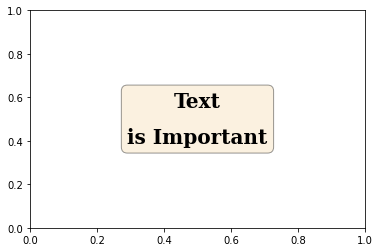

In [27]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        color='black',
        linespacing=2,
        va='center', # top, bottom, center
        ha='center', # left, right, center
        rotation='horizontal', # vertical?
        
        # ec = edge color
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.4, ec='black')
       )


plt.show()

## 3. Text API 별 추가 사용법 with 실습

### 3-0. 기본적인 플롯
- 성적 데이터
- 수학 성적과 읽기성적의 관계를 보자

In [28]:
student = pd.read_csv('./StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


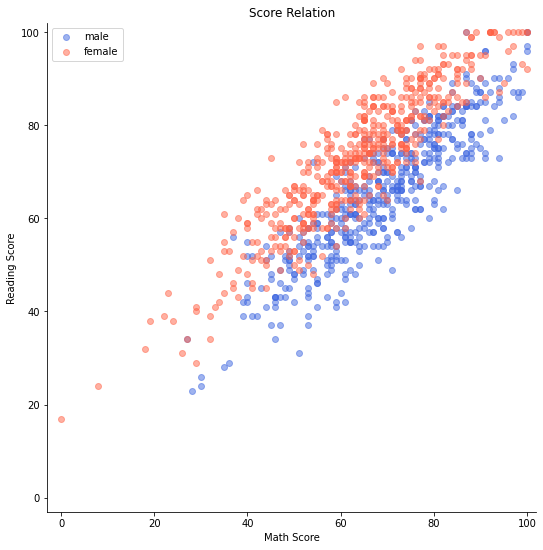

In [29]:
# 성별에 따라 색 구분
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

for g, c in zip(['male', 'female'], ['royalblue', 'tomato']):
    student_sub = student[student['gender']==g]
    ax.scatter(x=student_sub ['math score'], y=student_sub ['reading score'],
               c=c,
               alpha=0.5, 
               label=g)
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation') 
ax.legend()   

plt.show()

### 3-1. Title & Legend

- 제목의 위치 조정하기
- 범례에 제목, 그림자 달기, 위치 조정하기

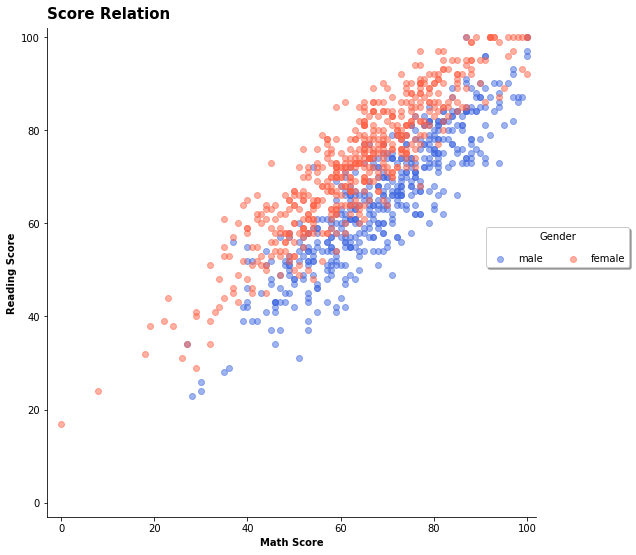

In [40]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

for g, c in zip(['male', 'female'], ['royalblue', 'tomato']):
    student_sub = student[student['gender']==g]
    ax.scatter(x=student_sub ['math score'], y=student_sub ['reading score'],
               c=c,
               alpha=0.5, 
               label=g)
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score', 
              fontweight='semibold')
ax.set_ylabel('Reading Score', 
              fontweight='semibold')

ax.set_title('Score Relation', 
             loc='left', va='bottom',
             fontweight='bold', fontsize=15
            )

ax.legend(
    title='Gender',
    shadow=True,
    labelspacing=1.2,
    loc='lower right', # 범례 위치를 지정
    bbox_to_anchor=[1.2, 0.5], # 범례 좌표를 지정
    ncol=2 # 길이
)

plt.show()

- bbox_to_anchor을 더 이해하고 싶다면 [link](https://stackoverflow.com/questions/39803385/what-does-a-4-element-tuple-argument-for-bbox-to-anchor-mean-in-matplotlib/39806180#39806180) 참고

### 3-2. Ticks & Text

- tick을 없애거나 조정하는 방법
- text의 alignment가 필요한 이유

In [41]:
student['math score'].head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [42]:
def score_band(x):
    tmp = (x+9)//10
    if tmp <= 1: 
        return '0 - 10'
    return f'{tmp*10-9} - {tmp*10}'

# math-range index 추가
student['math-range'] = student['math score'].apply(score_band)

# math-range sort
student['math-range'].value_counts().sort_index()

0 - 10        2
11 - 20       2
21 - 30      12
31 - 40      34
41 - 50     100
51 - 60     189
61 - 70     270
71 - 80     215
81 - 90     126
91 - 100     50
Name: math-range, dtype: int64

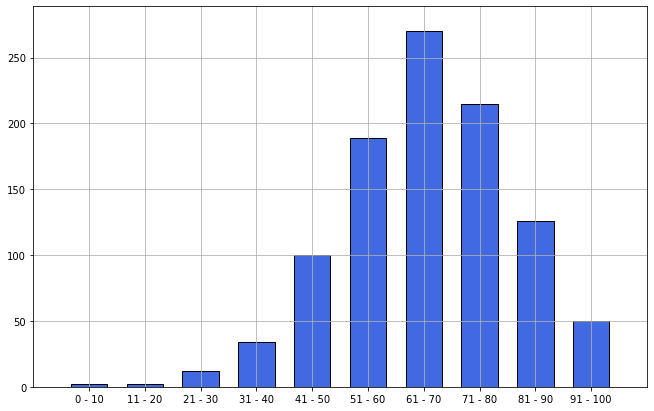

In [45]:
# math-range를 bar 차트로
math_grade = student['math-range'].value_counts().sort_index()

fig, ax = plt.subplots(1, 1, figsize=(11, 7))
ax.bar(math_grade.index, math_grade,
       width=0.65, 
       color='royalblue',
       linewidth=1,
       edgecolor='black'
      )

ax.margins(0.07)
ax.grid()
plt.show()

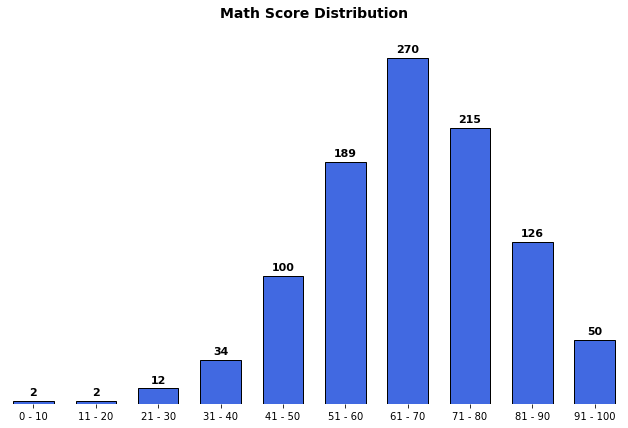

In [52]:
math_grade = student['math-range'].value_counts().sort_index()

fig, ax = plt.subplots(1, 1, figsize=(11, 7))
ax.bar(math_grade.index, math_grade,
       width=0.65, 
       color='royalblue',
       linewidth=1,
       edgecolor='black'
      )

ax.margins(0.01, 0.1)

# 변 모두 없애줌
ax.set(frame_on=False)

# y ticks 제거
ax.set_yticks([])

ax.set_xticks(np.arange(len(math_grade)))
ax.set_xticklabels(math_grade.index)

ax.set_title('Math Score Distribution', fontsize=14, fontweight='semibold')

for idx, val in math_grade.iteritems():
    ax.text(x=idx, y=val+3, s=val,
            va='bottom', ha='center',
            fontsize=11, fontweight='semibold'
           )

plt.show()

### 3-3. Annotate

- 화살표 사용하기

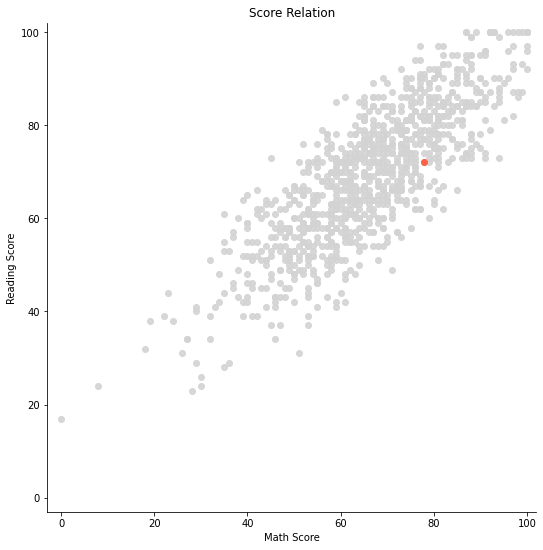

In [55]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

i = 13

ax.scatter(x=student['math score'], y=student['reading score'],
           c='lightgray',
           alpha=0.9, zorder=5)
    
ax.scatter(x=student['math score'][i], y=student['reading score'][i],
           c='tomato',
           alpha=1, zorder=10)    
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation') 


plt.show()

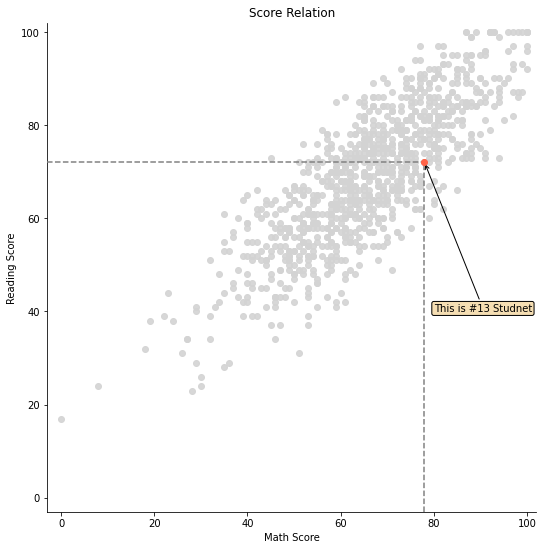

In [54]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

i = 13

ax.scatter(x=student['math score'], y=student['reading score'],
           c='lightgray',
           alpha=0.9, zorder=5)
    
ax.scatter(x=student['math score'][i], y=student['reading score'][i],
           c='tomato',
           alpha=1, zorder=10)    
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation') 

# x축과 평행한 선
ax.plot([-3, student['math score'][i]], [student['reading score'][i]]*2,
        color='gray', linestyle='--',
        zorder=8)

# y축과 평행한 선
ax.plot([student['math score'][i]]*2, [-3, student['reading score'][i]],
       color='gray', linestyle='--',
       zorder=8)

bbox = dict(boxstyle="round", fc='wheat', pad=0.2)
arrowprops = dict(
    arrowstyle="->")

# 원하는 텍스트, 화살표의 위치 
ax.annotate(text=f'This is #{i} Studnet',
            xy=(student['math score'][i], student['reading score'][i]),
            xytext=[80, 40],
            bbox=bbox,
            arrowprops=arrowprops,
            zorder=9
           )

plt.show()